# SpaceX Launch Analysis Project
This notebook includes:
- EDA visualizations
- Predictive analysis using Logistic Regression
- SQL insights using SQLite

In [ ]:
#Import Libraries and Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (8,6)})

# Load CSV file (Update path if needed)
DATA_PATH = r"C:/Users/SAM/Desktop/spacex/dataset_part_2.csv"
df = pd.read_csv(DATA_PATH)


In [ ]:
#Basic Data Overview
display(df.head())
display(df.info())
display(df.describe())


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

None

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


## TASK 1: Visualize the relationship between Flight Number and Launch Site

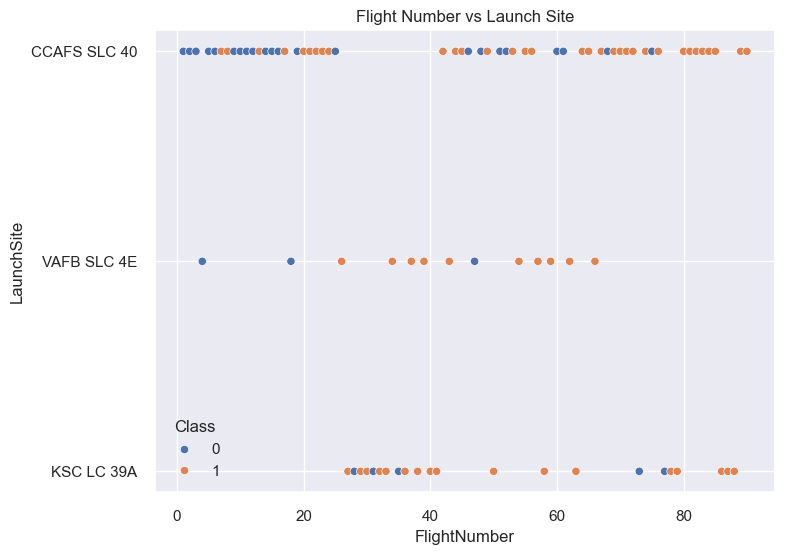

In [ ]:
#Scatterplot: Flight Number vs Launch Site
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite", hue="Class")
plt.title("Flight Number vs Launch Site")
plt.show()


## TASK 2: Visualize the relationship between Payload Mass and Launch Site

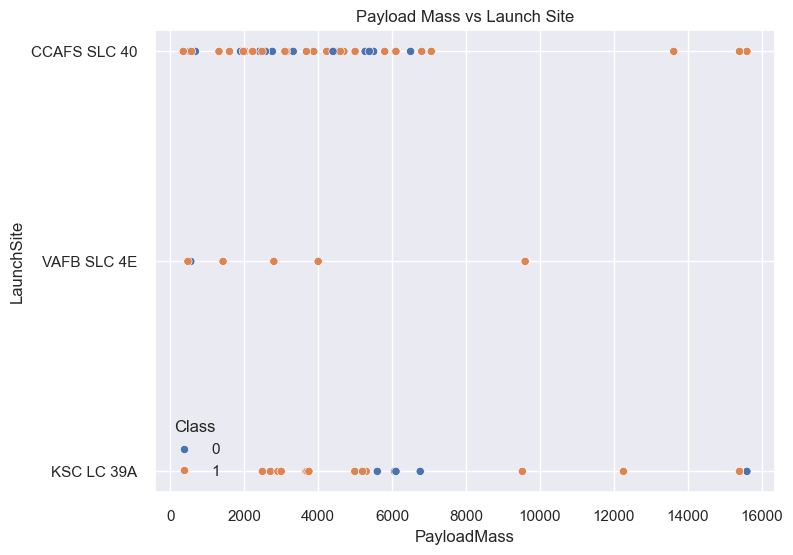

In [ ]:
#Scatterplot: Payload Mass vs Launch Site
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class")
plt.title("Payload Mass vs Launch Site")
plt.show()


## TASK 3: Visualize the relationship between success rate of each orbit type

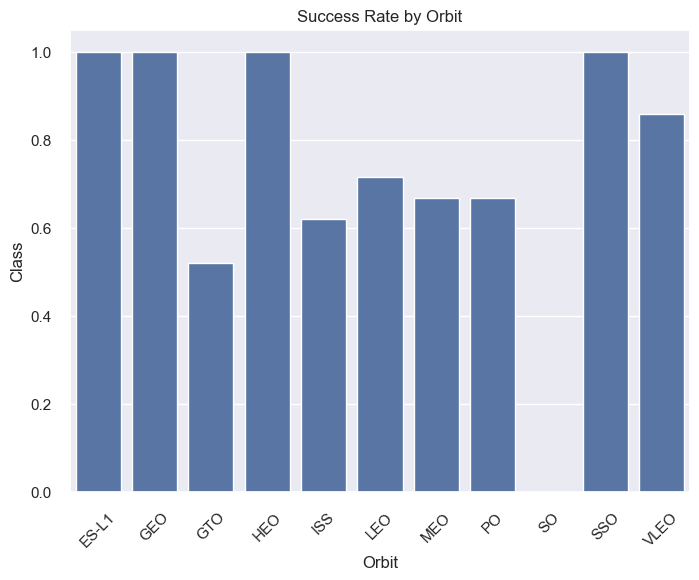

In [ ]:
#Bar chart: Success Rate by Orbit Type
orbit_rate = df.groupby("Orbit")["Class"].mean().reset_index()
sns.barplot(data=orbit_rate, x="Orbit", y="Class")
plt.xticks(rotation=45)
plt.title("Success Rate by Orbit")
plt.show()


## TASK 4: Visualize the relationship between Flight Number and Orbit type

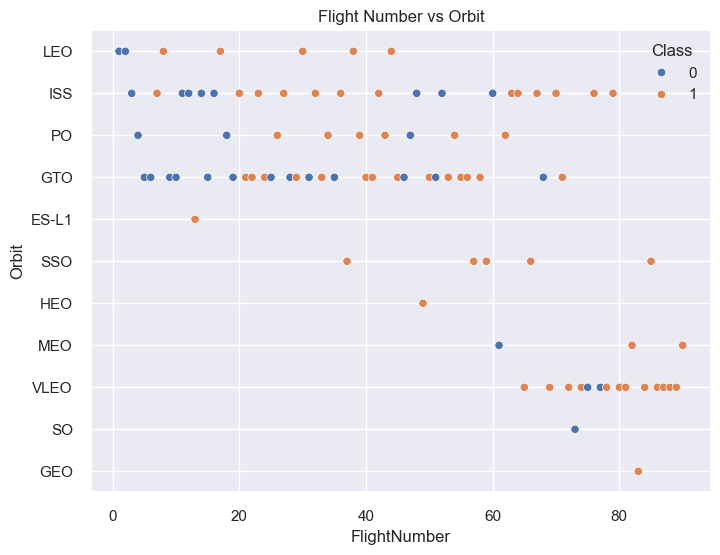

In [ ]:
#Scatterplot: Flight Number vs Orbit
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", hue="Class")
plt.title("Flight Number vs Orbit")
plt.show()


## TASK 5: Visualize the relationship between Payload Mass and Orbit type

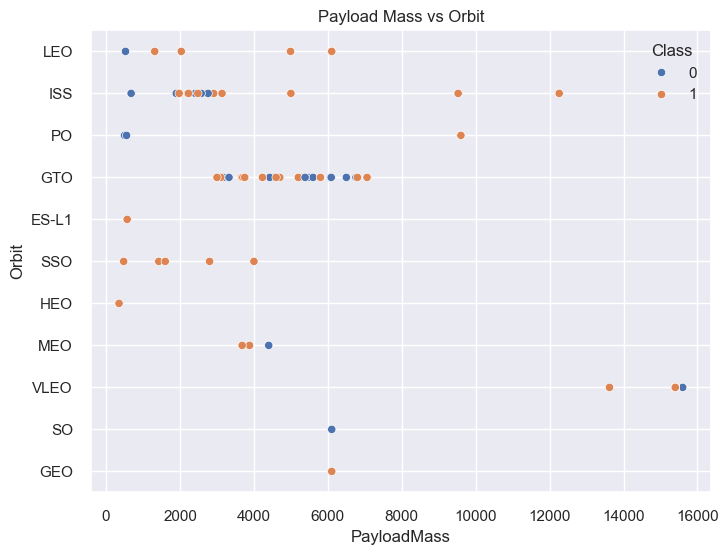

In [ ]:
#Scatterplot: Payload Mass vs Orbit
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", hue="Class")
plt.title("Payload Mass vs Orbit")
plt.show()


## TASK 6: Visualize the launch success yearly trend

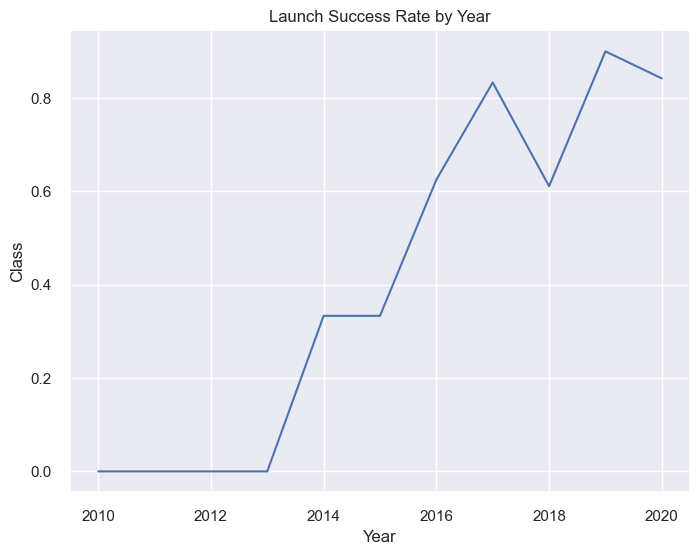

In [ ]:
#Lineplot: Success Rate by Year
df["Year"] = pd.to_datetime(df["Date"]).dt.year
year_rate = df.groupby("Year")["Class"].mean().reset_index()
sns.lineplot(data=year_rate, x="Year", y="Class")
plt.title("Launch Success Rate by Year")
plt.show()


## TASK 7: Predictive Model (Logistic Regression)

In [ ]:
#Predictive Model (Logistic Regression)
features = df[["FlightNumber", "PayloadMass"]]
target = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.77      0.83      0.80        12

    accuracy                           0.72        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.71      0.72      0.72        18



## TASK 8: SQL Analysis

In [ ]:
#SQL Analysis using SQLite
conn = sqlite3.connect(":memory:")
df.to_sql("spacex", conn, if_exists="replace", index=False)

# Query 1: Launch counts per site
query1 = """
SELECT LaunchSite, COUNT(*) AS Launch_Count
FROM spacex
GROUP BY LaunchSite
ORDER BY Launch_Count DESC
"""
display(pd.read_sql(query1, conn))

# Query 2: Average success rate per orbit
query2 = """
SELECT Orbit, ROUND(AVG(Class),2) AS Success_Rate
FROM spacex
GROUP BY Orbit
"""
display(pd.read_sql(query2, conn))


,LaunchSite,Launch_Count
0,CCAFS SLC 40,55
1,KSC LC 39A,22
2,VAFB SLC 4E,13


,Orbit,Success_Rate
0,ES-L1,1.00
1,GEO,1.00
2,GTO,0.52
3,HEO,1.00
4,ISS,0.62
5,LEO,0.71
6,MEO,0.67
7,PO,0.67
8,SO,0.00
9,SSO,1.00
